<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
life_expectancy = pd.read_csv('/content/Life Expectancy Data.csv')
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Convert 'Year' column to datetime, setting January 1st as the default date for each year
life_expectancy['Year'] = pd.to_datetime(life_expectancy['Year'], format='%Y')

# Check the data type to ensure it's converted correctly
print(life_expectancy['Year'].head())
print(life_expectancy.dtypes)


0   2015-01-01
1   2014-01-01
2   2013-01-01
3   2012-01-01
4   2011-01-01
Name: Year, dtype: datetime64[ns]
Country                                    object
Year                               datetime64[ns]
Status                                     object
Life expectancy                           float64
Adult Mortality                           float64
infant deaths                               int64
Alcohol                                   float64
percentage expenditure                    float64
Hepatitis B                               float64
Measles                                     int64
 BMI                                      float64
under-five deaths                           int64
Polio                                     float64
Total expenditure                         float64
Diphtheria                                float64
 HIV/AIDS                                 float64
GDP                                       float64
Population                               

In [6]:
life_expectancy.columns = life_expectancy.columns.str.strip()

In [7]:
life_expectancy.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
#percentage of missing values
life_expectancy.isnull().sum()/life_expectancy.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


<Axes: >

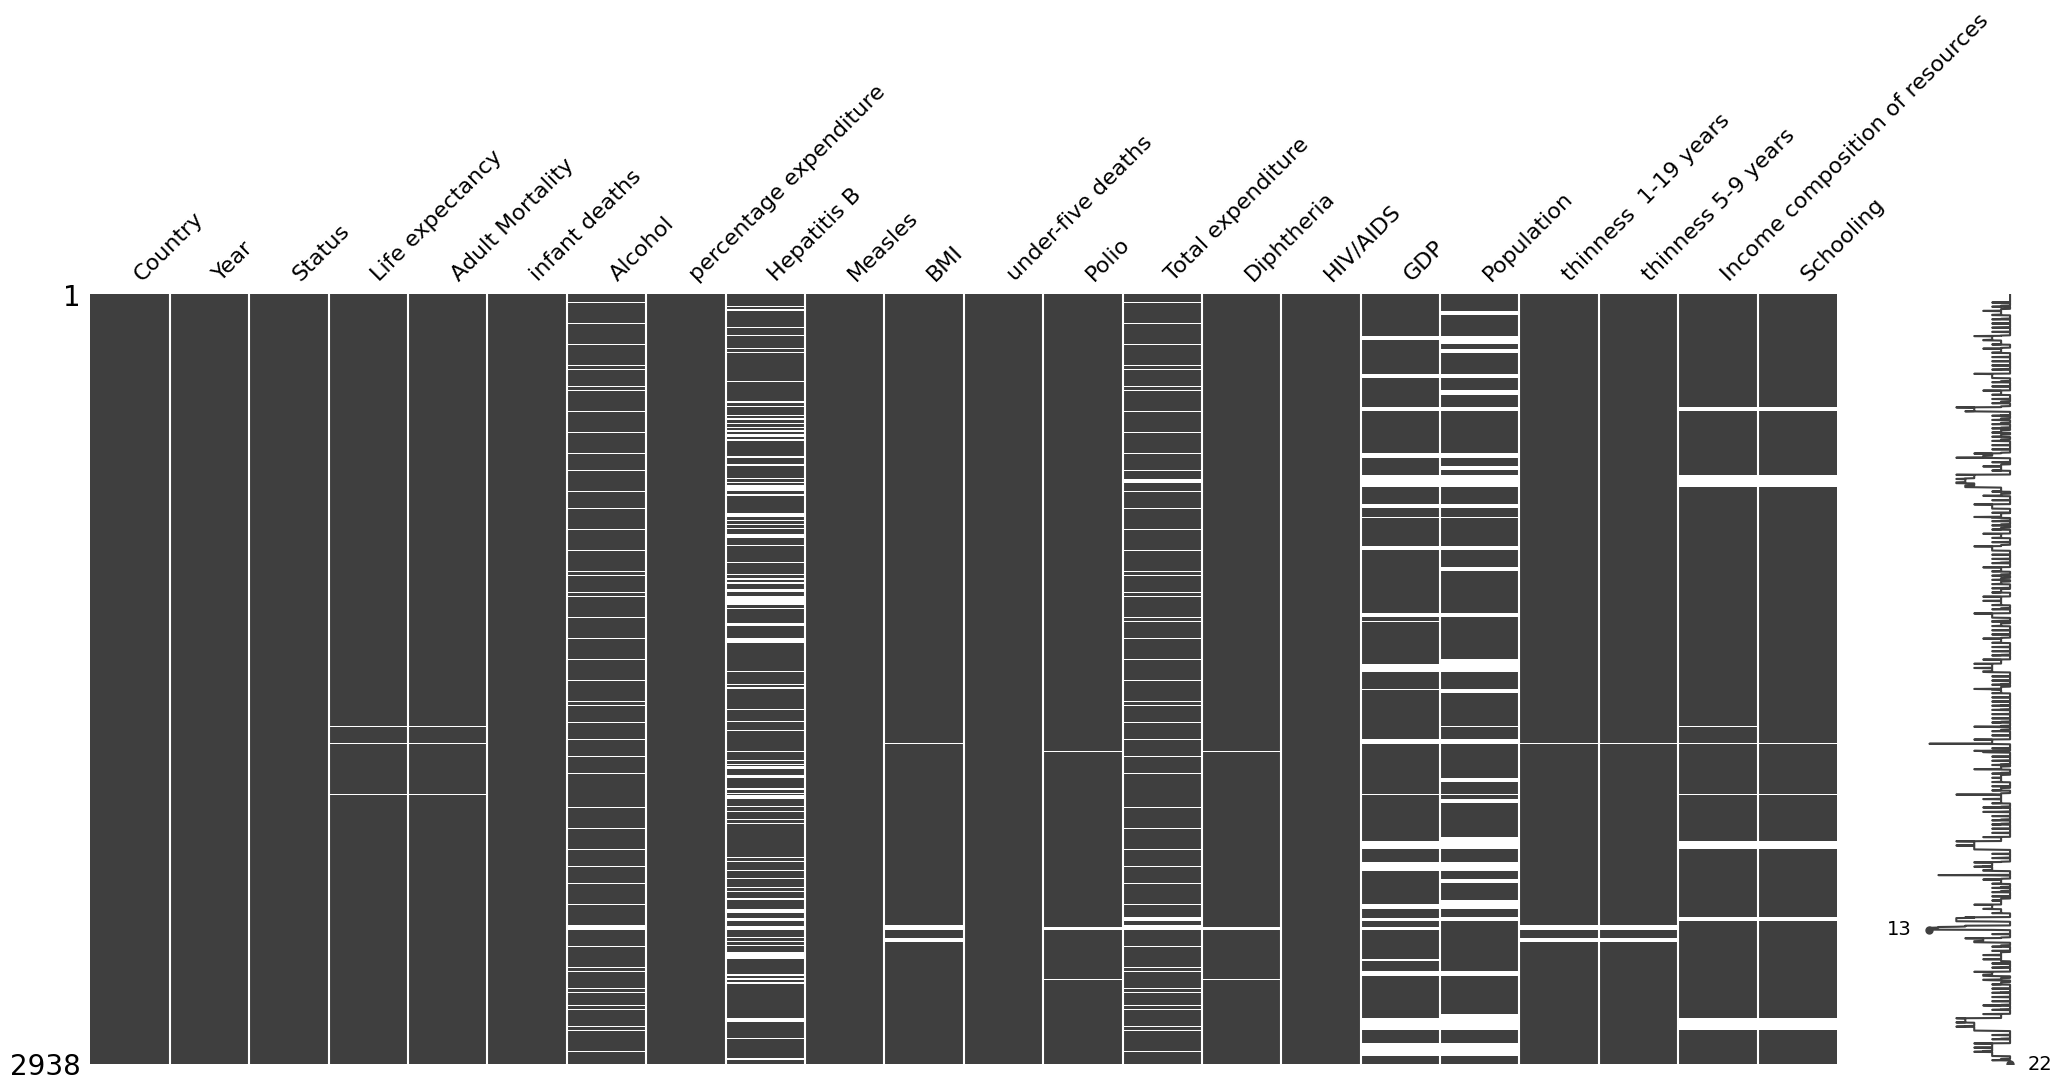

In [ ]:
msno.matrix(life_expectancy)

In [29]:
# Remove leading/trailing spaces from column names
life_expectancy.columns = life_expectancy.columns.str.replace(' ', '_')

# Verify the cleaned column names
print(life_expectancy.columns)

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


## K-Nearest Neighbors (KNN) Imputation

In [32]:
# Filling in Life expectancy and Adult Mortality which have related missing values using
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
life_expectancy[['Life_expectancy', 'Adult_Mortality']] = imputer.fit_transform(life_expectancy[['Life_expectancy', 'Adult_Mortality']])


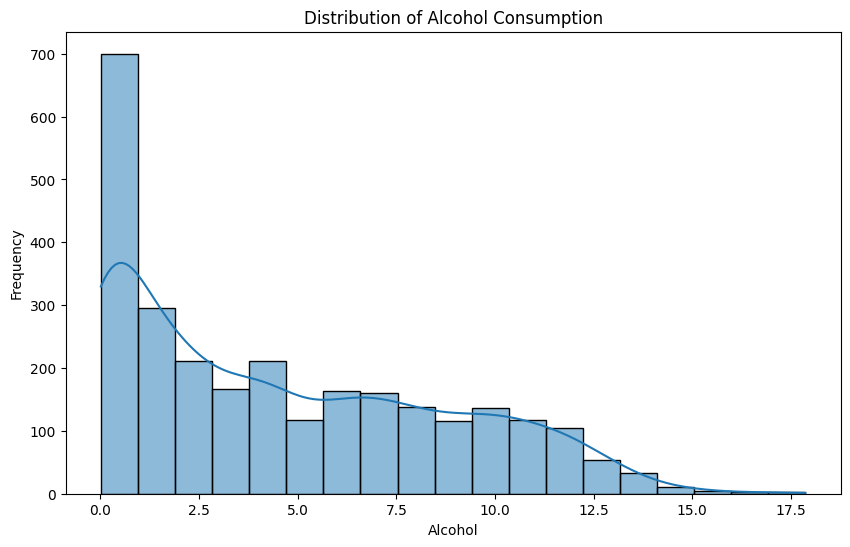

In [33]:
#distribution of values in the Alcohol column
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy['Alcohol'], kde=True)
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


In [ ]:
median_value = life_expectancy['Alcohol'].median()
life_expectancy['Alcohol'].fillna(median_value, inplace=True)

<ipython-input-11-1637ed5b7099>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_expectancy['Alcohol'].fillna(median_value, inplace=True)


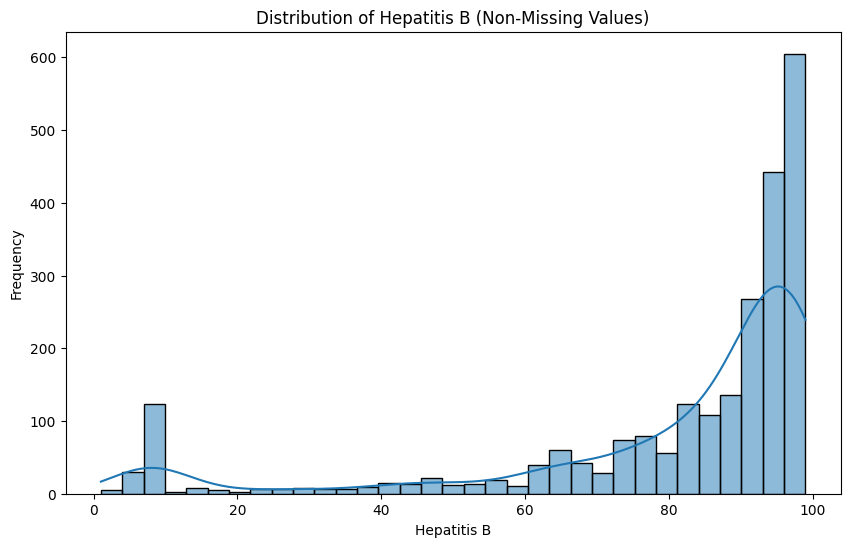

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy[life_expectancy['Hepatitis B'].notnull()]['Hepatitis B'], kde=True)
plt.title('Distribution of Hepatitis B (Non-Missing Values)')
plt.xlabel('Hepatitis B')
plt.ylabel('Frequency')
plt.show()


In [34]:
# Fill missing values in the 'Hepatitis B' column with the median
life_expectancy['Hepatitis_B'].fillna(life_expectancy['Hepatitis_B'].median(), inplace=True)

<ipython-input-34-458c4b05ca78>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





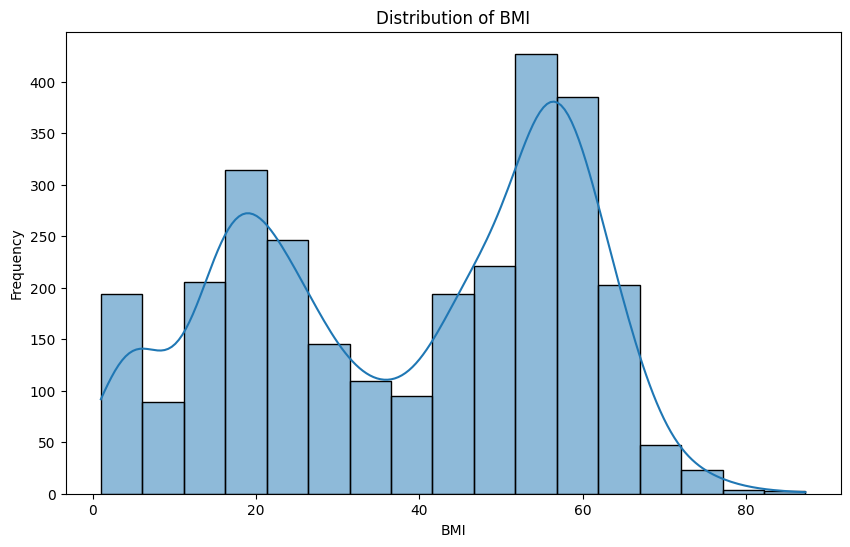

In [35]:
#distribution of values in the BMI column
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

##Impute Missing Values for Polio, Total_expenditure, Diphtheria and BMI

In [37]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer with n_neighbors set to 5
imputer = KNNImputer(n_neighbors=5)

# Select columns for KNN imputation
columns_to_impute = ['Polio', 'Total_expenditure', 'Diphtheria', 'BMI']

# Apply KNN imputation
life_expectancy[columns_to_impute] = imputer.fit_transform(life_expectancy[columns_to_impute])

# Verify the imputation
print(life_expectancy[columns_to_impute].isnull().sum())


Polio                0
Total_expenditure    0
Diphtheria           0
BMI                  0
dtype: int64


In [38]:
#Filling in missing values for the GDP and Population columns which are related

# Initialize the KNN imputer with n_neighbors set to 5
imputer = KNNImputer(n_neighbors=5)

# Select the columns for KNN imputation
columns_to_impute = ['GDP', 'Population']

# Apply KNN imputation
life_expectancy[columns_to_impute] = imputer.fit_transform(life_expectancy[columns_to_impute])

# Verify the imputation
print(life_expectancy[columns_to_impute].isnull().sum())


GDP           0
Population    0
dtype: int64


In [11]:
unique_countries = life_expectancy['Country'].unique()
unique_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [39]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation for the 'thinness1-19years' and 'thinness5-9years' columns
life_expectancy[['thinness_5-9_years', 'thinness__1-19_years']] = imputer.fit_transform(life_expectancy[['thinness_5-9_years', 'thinness__1-19_years']])

# Verify if missing values have been imputed
print(life_expectancy[['thinness_5-9_years', 'thinness__1-19_years']].isnull().sum())

thinness_5-9_years      0
thinness__1-19_years    0
dtype: int64


In [ ]:
life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life_expectancy,0
Adult_Mortality,0
infant_deaths,0
Alcohol,0
percentage_expenditure,0
Hepatitis_B,0
Measles,0


##KNN Imputation for Income and Schooling

In [40]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation for 'Incomecompositionofresources' and 'Schooling'
life_expectancy[['Income_composition_of_resources', 'Schooling']] = imputer.fit_transform(life_expectancy[['Income_composition_of_resources', 'Schooling']])

# Verify if missing values have been imputed
print(life_expectancy[['Income_composition_of_resources', 'Schooling']].isnull().sum())


Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [41]:
total_rows = len(life_expectancy)
print("Total rows:", total_rows)

Total rows: 2938


In [42]:
# Keep the last occurrence of each duplicated row
life_expectancy = life_expectancy.drop_duplicates(keep='last')

In [ ]:
total_rows = len(life_expectancy)
print("Total rows:", total_rows)

Total rows: 2938


#Exploratory Data Analysis (EDA)

In [43]:
#Statistical Summary
life_expectancy.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2744.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,83.022124,2419.592240,38.283721,42.035739,82.560127,5.943691,82.335114,1.742103,7478.865648,1.262869e+07,4.839704,4.870317,0.627108,11.992793
std,4.613841,9.507640,124.080302,117.926501,4.052413,1987.914858,22.996984,11467.272489,19.977966,160.445548,23.359285,2.439056,23.646771,5.077785,13148.607368,5.410912e+07,4.394535,4.482708,0.205543,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,0.877500,4.685343,82.000000,0.000000,19.325000,0.000000,78.000000,4.300000,78.000000,0.100000,579.507175,3.978545e+05,1.600000,1.600000,0.504000,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.100000,4.000000,93.000000,5.800000,93.000000,0.100000,2990.096266,2.956390e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.702500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.447500,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772750,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


##  Correlation
Relationships between numerical variables using correlation.

Top 5 factors most correlated with Life expectancy:
Schooling                          0.715066
Adult_Mortality                    0.696359
Income_composition_of_resources    0.690045
BMI                                0.560516
HIV/AIDS                           0.556457
Name: Life_expectancy, dtype: float64


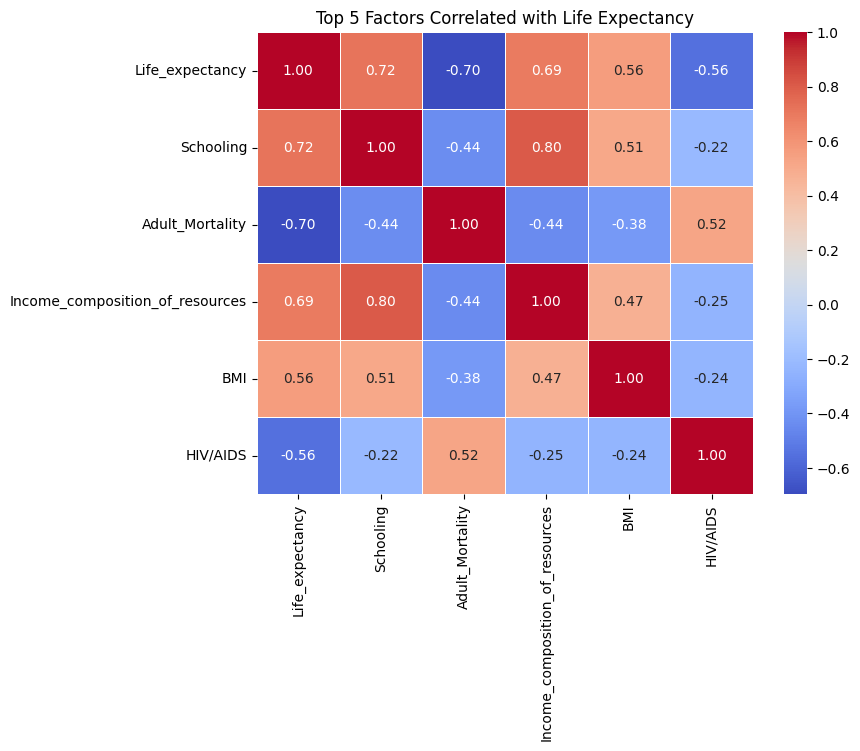

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = life_expectancy.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Identify the top 5 factors most correlated with 'Life expectancy'
top_5_factors = correlation_matrix['Life_expectancy'].abs().sort_values(ascending=False).iloc[1:6]
print("Top 5 factors most correlated with Life expectancy:")
print(top_5_factors)

# Filter correlation matrix to include only 'Life_expectancy' and the top 5 correlated factors
top_5_columns = ['Life_expectancy'] + top_5_factors.index.tolist()
top_5_correlation_matrix = correlation_matrix.loc[top_5_columns, top_5_columns]

# Plot the heatmap for the top 5 correlated features with 'Life expectancy'
plt.figure(figsize=(8, 6))
sns.heatmap(top_5_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Top 5 Factors Correlated with Life Expectancy')
plt.show()

# Data Analysis

##  Global life expectancy

In [45]:
# GeoJSON URL
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"

# Load the GeoJSON data
gdf = gpd.read_file(url)

# Display some basic information
gdf


,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,3,5,Netherlands,NL1,1,2,Country,Aruba,ABW,0,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,Admin-0 country,"POLYGON ((-69.89912 12.452, -69.8957 12.423, -..."
1,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 country,"POLYGON ((74.89131 37.23164, 74.84023 37.22505..."
2,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 country,"MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5..."
3,1,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,0,...,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,Admin-0 country,"POLYGON ((-63.00122 18.22178, -63.16001 18.171..."
4,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 country,"POLYGON ((20.06396 42.54727, 20.10352 42.52466..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,0,...,Oceania,Polynesia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country,"MULTIPOLYGON (((-171.4541 -14.04648, -171.7282..."
237,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,...,Asia,Western Asia,Middle East & North Africa,5,5,4,-99,1,Admin-0 country,"MULTIPOLYGON (((53.76318 12.63682, 53.8248 12...."
238,1,2,South Africa,ZAF,0,2,Sovereign country,South Africa,ZAF,0,...,Africa,Southern Africa,Sub-Saharan Africa,12,12,5,-99,1,Admin-0 country,"MULTIPOLYGON (((37.85693 -46.94424, 37.81396 -..."
239,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,...,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,Admin-0 country,"POLYGON ((32.91992 -9.40742, 32.92334 -9.43398..."


In [46]:
life_expectancy2 = life_expectancy.merge(gdf, how='inner', right_on='admin', left_on='Country')

In [47]:
dropping = ['scalerank', 'labelrank',
       'sovereignt', 'sov_a3', 'adm0_dif', 'level', 'type', 'admin', 'adm0_a3',
       'geou_dif', 'geounit', 'gu_a3', 'su_dif', 'subunit', 'su_a3',
       'brk_diff', 'name', 'name_long', 'brk_a3', 'brk_name', 'brk_group',
       'abbrev', 'postal', 'formal_en', 'formal_fr', 'note_adm0', 'note_brk',
       'name_sort', 'name_alt', 'mapcolor7', 'mapcolor8', 'mapcolor9',
       'mapcolor13', 'pop_est', 'gdp_md_est', 'pop_year', 'lastcensus',
       'gdp_year', 'economy', 'income_grp', 'wikipedia', 'fips_10', 'iso_a2',
       'iso_a3', 'iso_n3', 'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'adm0_a3_is',
       'adm0_a3_us', 'adm0_a3_un', 'adm0_a3_wb', 'continent', 'region_un',
       'subregion', 'region_wb', 'name_len', 'long_len', 'abbrev_len', 'tiny',
       'homepart', 'featureclass']

life_expectancy2.drop(columns=dropping, inplace=True)

In [48]:
life_expectancy2 = gpd.GeoDataFrame(life_expectancy2, geometry='geometry')

In [106]:
# Calculate the average life expectancy per year
avg_life_expectancy_per_year = life_expectancy.groupby('Year')['Life_expectancy'].mean().reset_index()

# Create a line plot to visualize the average life expectancy over the years
fig_avg_life_expectancy = px.line(
    avg_life_expectancy_per_year,
    x='Year',
    y='Life_expectancy',
    title='Average Life Expectancy Over the Years',
    labels={'Life_expectancy': 'Average Life Expectancy', 'Year': 'Year'},
    markers=True
)

# Customize the layout for better readability
fig_avg_life_expectancy.update_layout(
    height=600,
    xaxis_title='Year',
    yaxis_title='Average Life Expectancy',
    showlegend=False
)

# Show the plot
fig_avg_life_expectancy.show()

The average life expectancy worldwide in 2015 is: 71.61693989071038



# Life Expectancy Analysis

Life expectancy has increased globally, rising from 66 years in 2000 to 71 years in 2015. This steady rise highlights the significant improvements in public health, healthcare access, and living conditions worldwide.

The purpose of this analysis is to understand the trends in life expectancy across different countries and regions over time. By examining key factors such as healthcare advancements, nutrition, sanitation, and economic growth, we aim to identify patterns and correlations that contribute to this increase. We will focus on variables like GDP, schooling, adult mortality, and infant mortality, which have been shown to directly influence life expectancy. This analysis will provide valuable insights into the global improvements in health and help identify areas for further progress.

In [75]:
# Interactive choropleth map for life expectancy in 2015
fig = px.choropleth(life_expectancy_2015,
                    locations='Country',  # Column with country names
                    locationmode='country names',  # Use country names for matching geometries
                    color='Life_expectancy',  # Column for life expectancy
                    hover_name='Country',  # Show country names on hover
                    color_continuous_scale='viridis',  # Color scale for life expectancy
                    title='Global Life Expectancy by Country (2015)')

# Show the interactive figure
fig.show()

The average life expectancy worldwide in 2015 is: 71.61693989071038


## Regional Disparities:

The map clearly highlights stark differences in life expectancy across regions. Developed countries in North America, Europe, and parts of Asia typically show higher life expectancies, while many countries in sub-Saharan Africa still experience lower life expectancies, often below 60 years. These disparities point to varying levels of healthcare access, nutrition, and living standards.

In [77]:
import pandas as pd

# Assuming 'life_expectancy' is a DataFrame with 'Country', 'Life_expectancy', and 'Year' columns

# Filter the data for the year 2015
life_expectancy_2015 = life_expectancy[life_expectancy['Year'] == 2015]

# Updated list of countries by continent with the new lists for each continent
countries_by_continent = {
    'Africa': [
        'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
        'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea',
        'Eswatini (Swaziland)', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast (Côte d\'Ivoire)',
        'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
        'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
        'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Asia': [
        'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
        'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Maldives', 'Mongolia', 'Myanmar',
        'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste',
        'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia (Czech Republic)',
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
        'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation',
        'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom of Great Britain and Northern Ireland'
    ],
    'North America': [
        'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador',
        'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
        'Trinidad and Tobago', 'United States of America'
    ],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
        'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ],
    'South America': [
        'Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
        'Uruguay', 'Venezuela (Bolivarian Republic of)'
    ]
}

# Create an empty dictionary to store results
continent_stats = {}

# Loop through each continent and calculate the average life expectancy for 2015
for continent, countries in countries_by_continent.items():
    # Filter the data for the countries in the continent
    continent_data = life_expectancy_2015[life_expectancy_2015['Country'].isin(countries)]

    # Calculate the average life expectancy
    avg_life_expectancy = continent_data['Life_expectancy'].mean()

    # Store the results in the dictionary
    continent_stats[continent] = {
        'Average Life Expectancy': avg_life_expectancy
    }

# Convert the results into a DataFrame for better visualization
continent_stats_df = pd.DataFrame(continent_stats).T

# Display the result
print(continent_stats_df)


               Average Life Expectancy
Africa                       62.595918
Asia                         72.773684
Europe                       79.594444
North America                75.105000
Oceania                      72.160000
South America                75.225000


In [80]:
# Update the continent dictionary to include Singapore
countries_by_continent['Asia'].append('Singapore')

In [81]:
# Update the continent dictionary to include South Korea
countries_by_continent['Asia'].append('Republic of Korea')

In [54]:
# Calculate the number of countries for each continent
continent_country_counts = {continent: len(countries) for continent, countries in countries_by_continent.items()}

# Display the result
for continent, country_count in continent_country_counts.items():
    print(f"{continent}: {country_count} countries")

Africa: 52 countries
Asia: 40 countries
Europe: 40 countries
North America: 22 countries
Oceania: 14 countries
South America: 12 countries


In [78]:
# Assuming the 'continent_stats_df' DataFrame is already created and sorted
continent_stats_df_sorted = continent_stats_df.sort_values(by='Average Life Expectancy', ascending=False)

# Create an interactive bar plot with Plotly
fig = px.bar(continent_stats_df_sorted,
             x=continent_stats_df_sorted.index,
             y='Average Life Expectancy',
             title='Average Life Expectancy by Continent',
             labels={'Average Life Expectancy': 'Average Life Expectancy', 'index': 'Continent'})

# Show the plot
fig.show()


##Average Life Expectancy by Continent

In 2015, global life expectancy showed significant regional disparities, with Europe leading the pack in terms of average life expectancy, followed by South America, North America, Asia, Oceania, and Africa.

- 1.Europe: Europe ranked highest in life expectancy in 2015, reflecting the region’s advanced healthcare systems and overall higher standards of living. Many European countries, such as Switzerland, Spain, and France, saw life expectancies surpassing 80 years, thanks to well-established healthcare infrastructure and higher socioeconomic indicators.

- 2.South America: South America was second, with life expectancy in many countries reaching between 75 and 80 years. Countries like Chile and Argentina have improved healthcare systems and economic development, contributing to healthier populations. However, challenges remain in some regions, such as high inequality and healthcare disparities.

- 3.North America: North America, with the United States and Canada, had high life expectancy in 2015, though it ranked third. Canada’s robust healthcare system and high standard of living contributed to a life expectancy of over 80 years, while the U.S. faced challenges such as obesity and healthcare access issues, which impacted overall life expectancy rates.

- 4.Asia: Asia exhibited a wide range of life expectancy figures. Countries like Japan and Singapore had life expectancies above 80 years, among the highest globally. However, life expectancy varied greatly across the region, with many Southeast Asian countries facing challenges related to infectious diseases and healthcare accessibility, which contributed to lower life expectancy in those areas.

- 5.Oceania: Oceania, largely influenced by Australia and New Zealand, saw a relatively high life expectancy of around 80 years. However, Pacific island nations had much lower life expectancy rates, primarily due to high rates of non-communicable diseases, limited healthcare access, and economic challenges.

- 6.Africa: Africa had the lowest life expectancy in 2015, with many countries struggling to reach 60 years. This was driven by factors like high rates of infectious diseases (e.g., malaria, HIV/AIDS), limited healthcare infrastructure, and poverty. However, several countries, such as South Africa and Egypt, were beginning to show improvements due to advancements in healthcare and economic development.


In [108]:
import pandas as pd
import plotly.express as px

# Assuming 'life_expectancy' DataFrame is already defined and 'countries_by_continent' is available

# Filter the data for the year 2015 only
life_expectancy_2015 = life_expectancy[life_expectancy['Year'] == 2015]

# Remove duplicates based on the 'Country' column
life_expectancy_2015_no_duplicates = life_expectancy_2015.drop_duplicates(subset='Country')

# Sort the data by life expectancy in descending order and select the top 10
top_10_countries = life_expectancy_2015_no_duplicates.sort_values(by='Life_expectancy', ascending=False).head(10)

# Create a function to get the continent for each country
def get_continent(country):
    for continent, countries in countries_by_continent.items():
        if country in countries:
            return continent
    return 'Unknown'  # In case the country is not found

# Add the continent information to the top 10 countries DataFrame
top_10_countries['Continent'] = top_10_countries['Country'].apply(get_continent)

# Display the top 10 countries with their life expectancy and continent
print(top_10_countries[['Country', 'Life_expectancy', 'Continent']])

# Create an interactive horizontal bar plot with Plotly
fig = px.bar(top_10_countries,
             x='Life_expectancy',
             y='Country',
             color='Continent',
             title='Top 10 Countries by Life Expectancy (2015)',
             labels={'Life_expectancy': 'Life Expectancy', 'Country': 'Country'},
             color_discrete_map = {
                 'Africa': '#6A0DAD',    # Deep purple
                 'Asia': '#4B0082',      # Indigo
                 'Europe': '#5F9EA0',    # Royal blue
                 'North America': '#4682B4',  # Steel blue
                 'South America': '#4169E1',  # Cadet blue
                 'Oceania': '#87CEFA'    # Light sky blue
             },
             text='Life_expectancy')  # Add life expectancy values on the bars

# Customize the layout for better readability
fig.update_layout(
    height=600,  # Adjust plot height
    xaxis_title='Life Expectancy',
    yaxis_title='Country',
    xaxis=dict(tickformat=".0f"),  # Format life expectancy to avoid decimals
    yaxis=dict(categoryorder='total ascending'),  # Sort countries by life expectancy in descending order
    showlegend=True
)

# Show the plot
fig.show()


          Country  Life_expectancy      Continent
2345     Slovenia             88.0         Europe
737       Denmark             86.0         Europe
673        Cyprus             85.0         Europe
544         Chile             85.0  South America
1314        Japan             83.7           Asia
2521  Switzerland             83.4         Europe
2313    Singapore             83.1           Asia
2425        Spain             82.8         Europe
112     Australia             82.8        Oceania
1282        Italy             82.7         Europe


## Top 10 Countries with the Highest Life Expectancy in 2015

In 2015, the top 10 countries with the highest life expectancy were primarily concentrated in Europe, with notable entries from Asia, Oceania, and North America. The life expectancy ranged from 88 years in Slovenia to 82.7 years in Italy. These countries shared strong healthcare systems, economic stability, and high standards of living, contributing to their high life expectancy rates.

### Key Highlights:

- **Slovenia (88.0 years)**  
  Slovenia led the list with the highest life expectancy. The country benefits from well-developed healthcare, a strong social safety net, and a high standard of living.

- **Denmark (86.0 years)**  
  Denmark’s impressive life expectancy can be attributed to its robust healthcare system, progressive social policies, and overall high quality of life.

- **Cyprus (85.0 years)**  
  Cyprus shares the third spot, with life expectancy supported by healthcare improvements, a well-balanced diet, and Mediterranean lifestyle factors.

- **Chile (85.0 years)**  
  Chile, the highest-ranked South American country, showcases significant improvements in healthcare, nutrition, and overall economic development, driving its high life expectancy.

- **Japan (83.7 years)**  
  Japan, a leader in Asia, is known for its low infant mortality rates, a strong healthcare system, and healthy lifestyle choices contributing to long life expectancy.

- **Switzerland (83.4 years)**  
  Switzerland has a highly efficient healthcare system, strong economy, and excellent living conditions, contributing to its high life expectancy.

- **Singapore (83.1 years)**  
  Singapore ranks high due to its highly developed healthcare system, good nutrition, and efficient public health measures, which have increased life expectancy.

- **Spain (82.8 years)**  
  Spain benefits from a Mediterranean diet, access to quality healthcare, and a strong social system, which contribute to its high life expectancy.

- **Australia (82.8 years)**  
  Australia ranks highly thanks to its excellent healthcare system, good standard of living, and a healthy lifestyle that promotes longevity.

- **Italy (82.7 years)**  
  Italy’s life expectancy is driven by its Mediterranean diet, high-quality healthcare system, and active lifestyle, particularly in older populations.

  Summary: These 16 countries, predominantly from Europe, stand out for their high life expectancy rates in 2015, attributed to strong healthcare systems, good nutrition, healthy lifestyles, and strong social infrastructure. Countries like Slovenia, Denmark, and Switzerland lead the way, but nations from Asia, such as Japan and Singapore, also perform remarkably well due to their health-focused policies. While each country has unique factors contributing to longevity, a common thread across all is access to quality healthcare, healthy diets, and high living standards.

In [90]:
# Filter the data for 2015 only
life_expectancy_2015 = life_expectancy[life_expectancy['Year'] == 2015]

# Remove duplicates based on the 'Country' column
life_expectancy_no_duplicates = life_expectancy_2015.drop_duplicates(subset='Country')

# Sort the data by life expectancy in ascending order and select the bottom 10
bottom_10_countries = life_expectancy_no_duplicates.sort_values(by='Life_expectancy', ascending=True).head(10)

# Add continent information to the bottom 10 countries DataFrame
bottom_10_countries['Continent'] = bottom_10_countries['Country'].apply(get_continent)

# Display the bottom 10 countries with their life expectancy and continent
print(bottom_10_countries[['Country', 'Life_expectancy', 'Continent']])

# Sort the bottom 10 countries by life expectancy in descending order
bottom_10_countries_sorted_desc = bottom_10_countries.sort_values(by='Life_expectancy', ascending=False)

# Visualize the bottom 10 countries using a bar plot in Plotly
import plotly.express as px

# Create an interactive bar plot with Plotly
fig = px.bar(
    bottom_10_countries_sorted_desc,  # Use the sorted DataFrame
    x='Country',
    y='Life_expectancy',
    color='Continent',
    title='Bottom 10 Countries by Life Expectancy (2015)',
    labels={'Life_expectancy': 'Life Expectancy', 'Country': 'Country'},
    color_discrete_map={
        'Africa':  '#4169E1',     # Deep purple
        'Asia': '#4B0082',        # Indigo
        'Europe': '#6A0DAD',      # Royal blue
        'North America': '#4682B4',  # Steel blue
        'South America': '#5F9EA0',  # Cadet blue
        'Oceania': '#87CEFA'      # Light sky blue
    }
)

# Show the plot
fig.show()

                       Country  Life_expectancy Continent
2297              Sierra Leone             51.0    Africa
48                      Angola             52.4    Africa
512   Central African Republic             52.5    Africa
528                       Chad             53.1    Africa
432              Côte d'Ivoire             53.3    Africa
1474                   Lesotho             53.7    Africa
1893                   Nigeria             54.5    Africa
2377                   Somalia             55.0    Africa
2409               South Sudan             57.3    Africa
480                   Cameroon             57.3    Africa


### Countries with the Lowest Life Expectancy in 2015 (Africa)

The following countries had some of the lowest life expectancies in the world as of 2015, all of which are located in Africa. Life expectancy in these countries ranged from 51 years in Sierra Leone to 57.3 years in Cameroon and South Sudan. The challenges contributing to these low life expectancies include poor healthcare systems, limited access to nutrition and clean water, ongoing conflicts, and economic instability.

1. **Sierra Leone (51.0 years)**  
   Sierra Leone had the lowest life expectancy in 2015. The country faced a devastating Ebola outbreak in 2014–2016, which heavily impacted public health, coupled with challenges such as poverty, limited healthcare infrastructure, and a lack of access to basic services.

2. **Angola (52.4 years)**  
   Angola, a country recovering from a prolonged civil war that ended in 2002, faced significant challenges in healthcare delivery and infrastructure. Malnutrition, high infant mortality rates, and poor access to medical care were contributing factors to its low life expectancy.

3. **Central African Republic (52.5 years)**  
   The Central African Republic has been plagued by political instability and violence for many years. These conditions have disrupted access to healthcare, education, and nutrition, leading to a lower average life expectancy.

4. **Chad (53.1 years)**  
   Chad's low life expectancy is primarily attributed to limited access to healthcare services, high rates of infectious diseases, and malnutrition. Furthermore, the country’s landlocked geography and economic challenges hinder access to international aid and development.

5. **Côte d'Ivoire (53.3 years)**  
   Côte d'Ivoire has experienced periods of civil unrest and political instability, which have undermined the country’s healthcare system. Despite improvements in some areas, challenges such as infectious diseases, inadequate healthcare infrastructure, and high poverty rates continue to impact life expectancy.

6. **Lesotho (53.7 years)**  
   Lesotho faces a high HIV/AIDS prevalence, which has significantly reduced life expectancy. The country also struggles with poverty, poor healthcare systems, and limited access to clean water and sanitation.

7. **Nigeria (54.5 years)**  
   Nigeria, Africa's most populous country, faces numerous challenges, including high infant mortality rates, infectious diseases, inadequate healthcare infrastructure, and political instability. Despite its economic potential, Nigeria has one of the lowest life expectancies in the world.

8. **Somalia (55.0 years)**  
   Somalia has been affected by decades of conflict, poverty, and a lack of access to basic healthcare services. These factors, along with recurring droughts, famine, and a weak healthcare system, contribute to its low life expectancy.

9. **South Sudan (57.3 years)**  
   South Sudan, a country born from a 2011 independence referendum, has been deeply affected by ongoing civil conflict. This conflict has devastated its healthcare infrastructure, leading to high rates of preventable diseases, malnutrition, and a low life expectancy.

10. **Cameroon (57.3 years)**  
   Cameroon faces challenges in healthcare access, sanitation, and nutrition, though it is relatively more stable than some other countries on this list. Nevertheless, high rates of infectious diseases, poor medical infrastructure, and limited access to clean water impact the life expectancy of its population.

### Conclusion:
These African countries face multiple challenges that contribute to their low life expectancy. Conflict, inadequate healthcare, poor nutrition, and economic instability are some of the major issues that hinder the overall health and longevity of populations in these nations. Despite these challenges, there are ongoing efforts to improve healthcare systems, reduce poverty, and address the root causes of low life expectancy through various international partnerships and domestic reforms. However, much work remains to be done to improve the overall quality of life and increase life expectancy in these regions.


In [88]:
# Append 'Côte d'Ivoire' to the list of African countries
countries_by_continent['Africa'].append("Côte d'Ivoire")

In [93]:
import pandas as pd
import plotly.express as px

# Assuming life_expectancy DataFrame contains 'Year', 'Life_expectancy', and 'Country' columns

# Remove duplicates based on the 'Country' column and sort by life expectancy
life_expectancy_no_duplicates = life_expectancy.drop_duplicates(subset='Country')

# Identify the top 3 and bottom 3 countries based on the latest available life expectancy (for a specific year, e.g., 2015)
latest_year = 2015  # You can adjust this to use the most recent data if needed
latest_data = life_expectancy[life_expectancy['Year'] == latest_year]

# Sort and select top 3 and bottom 3 countries
top_3_countries = latest_data.sort_values(by='Life_expectancy', ascending=False).head(3)
bottom_3_countries = latest_data.sort_values(by='Life_expectancy', ascending=True).head(3)

# Combine the top 3 and bottom 3 countries
top_and_bottom_countries = pd.concat([top_3_countries, bottom_3_countries])

# Filter the original dataset to include only the top 3 and bottom 3 countries
filtered_data = life_expectancy[life_expectancy['Country'].isin(top_and_bottom_countries['Country'])]

# Create a line plot to compare life expectancy trends over time for the top and bottom 3 countries
fig = px.line(filtered_data,
              x='Year',
              y='Life_expectancy',
              color='Country',
              title='Life Expectancy Trends over time for Top 3 and Bottom 3 Countries upto 2015',
              labels={'Life_expectancy': 'Life Expectancy', 'Year': 'Year'},
              markers=True)

# Customize the layout for better readability
fig.update_layout(
    height=600,
    xaxis_title='Year',
    yaxis_title='Life Expectancy',
    showlegend=True
)

# Show the plot
fig.show()

In [97]:
# Create a line plot to compare Schooling trends over time for the top 3 and bottom 3 countries
fig_schooling = px.line(
    filtered_data,
    x='Year',
    y='Schooling',  # Use Schooling as the y-axis
    color='Country',
    title='Schooling Trends over time for Top 3 and Bottom 3 Countries upto 2015',
    labels={'Schooling': 'Schooling', 'Year': 'Year'},
    markers=True
)

# Customize the layout for better readability
fig_schooling.update_layout(
    height=600,
    xaxis_title='Year',
    yaxis_title='Schooling',
    showlegend=True
)

# Show the plot
fig_schooling.show()

In [101]:
# Create a line plot to compare Adult Mortality trends over time for the top 3 and bottom 3 countries
fig_adult_mortality = px.line(
    filtered_data,
    x='Year',
    y='Adult_Mortality',  # Corrected column name for Adult Mortality
    color='Country',
    title='Adult Mortality Trends over time for Top 3 and Bottom 3 Countries upto 2015',
    labels={'Adult_Mortality': 'Adult Mortality', 'Year': 'Year'},
    markers=True
)

# Customize the layout for better readability
fig_adult_mortality.update_layout(
    height=600,
    xaxis_title='Year',
    yaxis_title='Adult Mortality',
    showlegend=True
)

# Show the plot
fig_adult_mortality.show()

In [ ]:
# List of African countries (already available as countries_by_continent dictionary)
african_countries = countries_by_continent['Africa']

# Filter the life expectancy data to include only African countries
african_life_expectancy = life_expectancy[life_expectancy['Country'].isin(african_countries)]

# Remove duplicates based on 'Country' column
african_life_expectancy_no_duplicates = african_life_expectancy.drop_duplicates(subset='Country')

# Sort by life expectancy in descending order and select the top 10
top_10_african_countries = african_life_expectancy_no_duplicates.sort_values(by='Life_expectancy', ascending=False).head(10)

# Add continent information to the top 10 African countries DataFrame
top_10_african_countries['Continent'] = 'Africa'

# Display the top 10 African countries with their life expectancy
print(top_10_african_countries[['Country', 'Life_expectancy', 'Continent']])

# Visualize the top 10 African countries using a bar plot in Plotly
import plotly.express as px

# Create an interactive bar plot with Plotly
fig = px.bar(
    top_10_african_countries,
    x='Country',
    y='Life_expectancy',
    color='Continent',
    title='Top 10 African Countries by Life Expectancy',
    labels={'Life_expectancy': 'Life Expectancy', 'Country': 'Country'},
    color_discrete_map={
        'Africa': '#5F9EA0'  # Deep purple for Africa
    }
)

# Show the plot
fig.show()

         Country  Life_expectancy Continent
802        Egypt             79.0    Africa
32       Algeria             75.6    Africa
1667   Mauritius             74.6    Africa
1748     Morocco             74.3    Africa
448   Cabo Verde             73.3    Africa
2281  Seychelles             73.2    Africa
1506       Libya             72.7    Africa
2922    Zimbabwe             67.0    Africa
2249     Senegal             66.7    Africa
2151      Rwanda             66.1    Africa


In [ ]:
 # Get the correlation values between 'Life_expectancy' and other factors
life_expectancy_corr = corr_data['Life_expectancy']

# Sort the correlations in descending order (highest to lowest)
sorted_life_expectancy_corr = life_expectancy_corr.sort_values(ascending=False)

# Display the highest correlated factors
print("Highest Correlated Factors with Life Expectancy:")
print(sorted_life_expectancy_corr)

Highest Correlated Factors with Life Expectancy:
Life_expectancy    1.000000
Adult_Mortality    0.668383
Schooling          0.040731
GDP               -0.529799
BMI               -0.565215
Name: Life_expectancy, dtype: float64


In [ ]:
import plotly.express as px

# List of European countries (same as before)
european_countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
    'Ukraine', 'United Kingdom of Great Britain and Northern Ireland'
]

# Filter the life_expectancy dataframe to include only European countries
european_life_expectancy = life_expectancy[life_expectancy['Country'].isin(european_countries)]

# Remove duplicates based on 'Country'
european_life_expectancy = european_life_expectancy.drop_duplicates(subset='Country')

# Create an interactive scatter plot with a single trendline for all European countries
fig = px.scatter(european_life_expectancy,
                 x='Adult_Mortality',
                 y='Life_expectancy',
                 color='Country',  # Color points by country
                 title='Correlation Between Adult Mortality and Life Expectancy (European Countries)',
                 labels={'Adult_Mortality': 'Adult Mortality', 'Life_expectancy': 'Life Expectancy'},
                 hover_data=['Country', 'GDP', 'Schooling', 'BMI', 'HIV/AIDS'],  # Hover info
                 trendline='ols',  # Add a single overall trendline
                 trendline_scope='overall')  # Only one trendline for the entire dataset

# Update layout to remove grid lines
fig.update_layout(
    xaxis=dict(showgrid=False),  # Remove grid lines on x-axis
    yaxis=dict(showgrid=False)   # Remove grid lines on y-axis
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# List of European countries (same as before)
european_countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
    'Ukraine', 'United Kingdom of Great Britain and Northern Ireland'
]

# Filter the life_expectancy dataframe to include only European countries
european_life_expectancy = life_expectancy[life_expectancy['Country'].isin(european_countries)]

# Remove duplicates based on 'Country'
european_life_expectancy = european_life_expectancy.drop_duplicates(subset='Country')

# Create an interactive scatter plot with GDP on the x-axis
fig = px.scatter(european_life_expectancy,
                 x='Schooling',  # Change x-axis to GDP
                 y='Life_expectancy',  # Keep y-axis as Life Expectancy
                 color='Country',  # Color points by country
                 title='Correlation Between Schooling, and Life Expectancy (European Countries)',
                 labels={'Schooling': 'Schooling', 'Life_expectancy': 'Life Expectancy'},
                 hover_data=['Country', 'Adult_Mortality', 'GDP', 'BMI', 'HIV/AIDS'],  # Hover info
                 trendline='ols',  # Add a trendline (ordinary least squares)
                 trendline_scope='overall')  # One overall trendline

# Update layout to remove grid lines
fig.update_layout(
    xaxis=dict(showgrid=False),  # Remove grid lines on x-axis
    yaxis=dict(showgrid=False)   # Remove grid lines on y-axis
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# List of European countries (same as before)
european_countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
    'Ukraine', 'United Kingdom of Great Britain and Northern Ireland'
]

# Filter the life_expectancy dataframe to include only European countries
european_life_expectancy = life_expectancy[life_expectancy['Country'].isin(european_countries)]

# Remove duplicates based on 'Country'
european_life_expectancy = european_life_expectancy.drop_duplicates(subset='Country')

# Create an interactive scatter plot with GDP on the x-axis
fig = px.scatter(european_life_expectancy,
                 x='GDP',  # Change x-axis to GDP
                 y='Life_expectancy',  # Keep y-axis as Life Expectancy
                 color='Country',  # Color points by country
                 title='Correlation Between GDP and Life Expectancy (European Countries)',
                 labels={'GDP': 'GDP', 'Life_expectancy': 'Life Expectancy'},
                 hover_data=['Country', 'Adult_Mortality', 'Schooling', 'BMI', 'HIV/AIDS'],  # Hover info
                 trendline='ols',  # Add a trendline (ordinary least squares)
                 trendline_scope='overall')  # One overall trendline

# Update layout to remove grid lines
fig.update_layout(
    xaxis=dict(showgrid=False),  # Remove grid lines on x-axis
    yaxis=dict(showgrid=False)   # Remove grid lines on y-axis
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Strip any extra spaces from column names (if any)
life_expectancy.columns = life_expectancy.columns.str.strip()

# Check if 'Adult_Mortality' exists in the column names
if 'Adult_Mortality' in life_expectancy.columns:
    # Filter the data for selected countries
    countries_of_interest = ['Slovenia', 'Denmark', 'Switzerland', 'Italy', 'Spain']

    # Filter the data for the selected countries
    adult_mortality_filtered = life_expectancy[life_expectancy['Country'].isin(countries_of_interest)]

    # Create a line plot for adult mortality over time
    fig = px.line(adult_mortality_filtered,
                  x='Year',
                  y='Adult_Mortality',
                  color='Country',
                  title='Trend of Adult Mortality Over Time for Selected Countries in Europe',
                  labels={'Adult_Mortality': 'Adult Mortality Rate', 'Year': 'Year'},
                  markers=True)

    # Show the plot
    fig.show()
else:
    print("Column 'Adult_Mortality' does not exist in the dataset.")